In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
coca_cola_effect={
    'individuals':np.random.choice(['Elementary_student','Highschool_student','College_student'],100),
    'daily_drinking_coca_cola':np.round(np.random.normal(4,1,100),2),
    'BMI':np.round(np.random.normal(32,19,100),2),
    'diabetes_risk':np.round(np.random.uniform(13,2,100),2),
    'UTI_incidents':np.round(np.random.uniform(0,2,100),2),
}

df=pd.DataFrame(coca_cola_effect)
df.to_csv('coca_cola_effect_data.csv',index=False)

In [3]:
df=pd.read_csv('coca_cola_effect_data.csv')
print('Original Data Shape:',df.shape)

Original Data Shape: (100, 5)


In [4]:
df.loc[np.random.choice(df.index,10),'BMI']=np.nan
df.loc[np.random.choice(df.index,5),'diabetes_risk']=np.nan

In [5]:
df.to_csv('coca_cola_effect_data_miss.csv',index=False)

In [6]:
df=pd.read_csv('coca_cola_effect_data_miss.csv')
print('Original Data Shape:',df.shape)
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df=df.dropna(subset=['diabetes_risk'])
print('Cleaned Data Shape:',df.shape)
df.to_csv('coca_cola_effect_data_clean.csv',index=False)

Original Data Shape: (100, 5)
Cleaned Data Shape: (96, 5)


In [7]:
#Numpy
daily_drinking_coca_cola=df['daily_drinking_coca_cola'].to_numpy()
UTI_incidents=df['UTI_incidents'].to_numpy()
correlation=np.corrcoef(daily_drinking_coca_cola,UTI_incidents)[0,1]
print(f"Correlation between daily drinking coca cola and UTI incident:{correlation:.2f}")

Correlation between daily drinking coca cola and UTI incident:0.22


In [8]:
#Scipy
Elementary_student_daily_drinking_coca_cola=df[df['individuals']=='Elementary_student']['daily_drinking_coca_cola']
College_student_daily_drinking_coca_cola=df[df['individuals']=='College_student']['daily_drinking_coca_cola']
t_stat,p_value=stats.ttest_ind(Elementary_student_daily_drinking_coca_cola,College_student_daily_drinking_coca_cola)
print(f"T-test between Elementary student and College Student daily drinking coca cola:t={t_stat:.2f},p={p_value:3f}")

T-test between Elementary student and College Student daily drinking coca cola:t=0.63,p=0.533635


In [9]:
#Statmodels
X=sm.add_constant(df['diabetes_risk'])
model=sm.OLS(df['daily_drinking_coca_cola'],X).fit()
print("\nlinear Regression Summary:")
print(model.summary())


linear Regression Summary:
                               OLS Regression Results                               
Dep. Variable:     daily_drinking_coca_cola   R-squared:                       0.018
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     1.684
Date:                      Tue, 20 May 2025   Prob (F-statistic):              0.198
Time:                              05:41:09   Log-Likelihood:                -128.88
No. Observations:                        96   AIC:                             261.8
Df Residuals:                            94   BIC:                             266.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

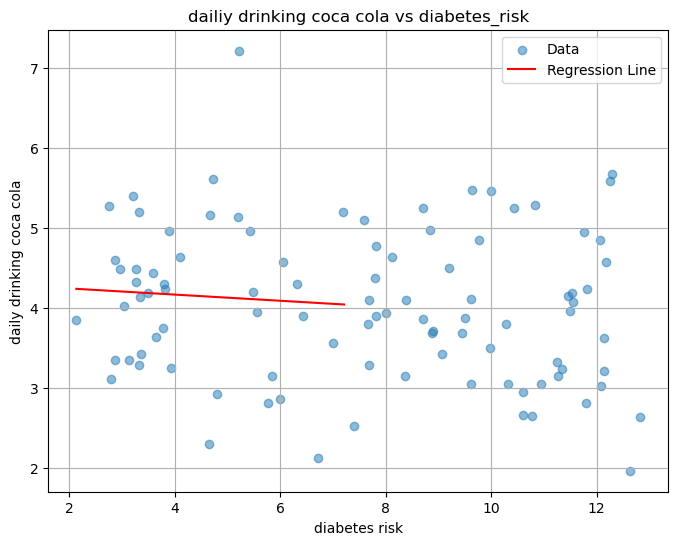

In [10]:
#Visualisation(Linear Registration) via Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['diabetes_risk'],df['daily_drinking_coca_cola'],alpha=0.5,label='Data')
x_range=np.linspace(df['diabetes_risk'].min(),df['daily_drinking_coca_cola'].max(),100)
y_pred=model.params.iloc[0]+model.params.iloc[1]*x_range
plt.plot(x_range,y_pred,color='red',label='Regression Line')
plt.title('dailiy drinking coca cola vs diabetes_risk')
plt.xlabel('diabetes risk')
plt.ylabel('daily drinking coca cola')
plt.legend()
plt.grid(True)
plt.show()

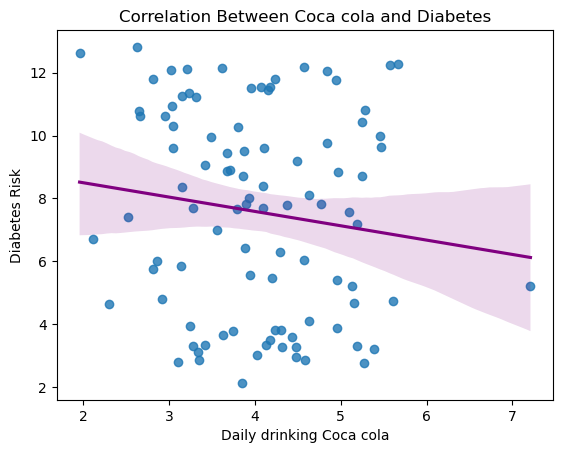

In [11]:
# Correlation plot with regression line
sns.regplot(data=df, x='daily_drinking_coca_cola', y='diabetes_risk', line_kws={'color': 'purple'})
plt.title('Correlation Between Coca cola and Diabetes')
plt.xlabel('Daily drinking Coca cola')
plt.ylabel('Diabetes Risk')
plt.show()